# Сборный проект №1 (Загидуллин Р.Р., когорта DA-58)

# Оглавление:
* [Шаг 1. Изучение общей информации:](#1-bullet)
* [Загрузка библиотек, изученеие файлов с данными, получение общей информации.Первичные выводы.](#1-bullet)
* [Шаг 2. Подготовка данных:](#2-bullet)
* [2.1 Заменим названия столбцов (приведем к нижнему регистру)](#3-bullet)
* [2.2 Проверим дубликаты](#4-bullet)
* [2.3 Найдем пропущенные значения](#5-bullet)
* [2.4 Преобразуем данные в нужные типы](#6-bullet)
* [2.5 Обработаем пропущенные значения в столбце 'rating'](#7-bullet)
* [Шаг 3. Исследовательский анализ](#8-bullet)
* [3.1 Распределение продаж игр по годам](#8-bullet)
* [3.2 Платформы с наибольшими суммарными продажами](#9-bullet)
* [3.3 Определение актуального временного интервала, наиболее перспективные платформы](#10-bullet)
* [3.4 Оценка влияния отзывов пользователей и критиков на продажи](#11-bullet)
* [3.5 Оценка расспределения игр по жанрам](#12-bullet)
* [Шаг 4. Портрет пользователя, по регионам](#13-bullet)
* [4.1 Северная Америка, топ платформы](#14-bullet)
* [4.2 Европа, топ платформы](#15-bullet)
* [4.3 Япония, топ платформы](#16-bullet)
* [4.4 Северная Америка, жанры](#17-bullet)
* [4.5 Европа, жанры](#18-bullet)
* [4.6 Япония, жанры](#19-bullet)
* [4.7 Зависимость продаж от рейтинга ESRB](#20-bullet)
* [Шаг 5. Проверка гипотез](#21-bullet)
* [5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#21-bullet)
* [5.2 Средние пользовательские рейтинги жанров Action и Sports разные](#22-bullet)
* [Итоговые выводы](#23-bullet)

|  Название  |  Описание  |
| :----: |  :---- |
|  **Вводная информация**  | Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  |
|  **Основное задание проекта**  |  Выявить определяющие успешность игры закономерности.|
| **Датасет**             | /datasets/games.csv |

## Обзор данных <a id="#1-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Нам на анализ предоставлен датасет с данными о продажах видеоигр (млн.копий) за период с 1980 по 2016 год, в разбивке по платформе, году выпуска игры, жанру и рынкам сбыта, также приведены данные об оценке игры критиками (профессиональным сообществом) и пользователями и присвоенный возрастной рейтинг. 

По результату применения метода info мы можем сказать следующее:
- Датасет содержит информацию о продажах игр разбитую на 11 столбцов и содержащую 16715 строк.

Мы видим что в данных есть следующие проблемы: 
* некоректно названы столбцы? причина - скорее всего, человеческий фактор, некорректная запись, решение - приведем названия столбцов к записи строчными буквами, 
* имеются пропуски в данных в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating, причина - для столбцов Name, Year_of_Release, Genre, скорее всего техническая ошибка либо человеческий фактор, для столбцов Critic_Score, User_Score, Rating, возможно оценка игре не установлена, рейтинг не присвоен, решение - в столбцах Name, Year_of_Release, Genre, пропусков немного, строки с пропусками удалим из фрейма, столбцы Critic_Score, User_Score не знаем чем можно заменить пропуски, пропусков слишком много, что бы удалять, поэтому оставим как есть. Пропуски в столбце Rating заменим на заглушку (не определен).
* возможно, в данных имеются дубликаты (будем проверять далее), причины техническая ошибка либо человеческий фактор, решение-удалим явные дубликаты, рассмотрим причины появления неявных дубликатов.
* типы данных в столбцах Year_of_Release и User_Score - неверные (так Year_of_Release содержит информацию о годе выпуска игры, необходимо привести к типу datetime, User_Score - содержит цифровую оценку (рейтинг) игры среди пользователей, необходимый тип - float, причина - техническая ошибка, решение - поменяем тип данных на верный.

## Подготовка данных. <a name="#2-bullet"></a>

### Заменим название столбцов <a name="#3-bullet"></a>

In [4]:
data.columns = data.columns.str.lower()#заменим названия столбцов, приведем к нижнему регистру
data.head()#проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Проверим наличие дубликатов <a name="#4-bullet"></a>

In [5]:
data.duplicated().sum()#проверим есть ли в данных дубликаты

0

In [6]:
data['name'].value_counts()#явных дубликатов в фрейме нет, проверим неявные.

Need for Speed: Most Wanted                                 12
Madden NFL 07                                                9
FIFA 14                                                      9
LEGO Marvel Super Heroes                                     9
Ratatouille                                                  9
                                                            ..
Rurouni Kenshin: Enjou! Kyoto Rinne                          1
Monster Hunter 4 Ultimate                                    1
DropCast                                                     1
Black Rose Valkyrie                                          1
God Eater Off Shot:Shiou-hen Twin Pack & Animation Vol.5     1
Name: name, Length: 11559, dtype: int64

In [7]:
data_duplicat = data.query('name == "Need for Speed: Most Wanted"')
#название игры "Need for Speed: Most Wanted" повторяется 12 раз.
data_duplicat

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Игра "Need for Speed: Most Wanted" оригинал, 2005 года выпуска (имел возможность играть в версию для PC) возможно лучшая игра серии Need for Speed, в 2012 году выпустили игру с аналогичным названием, в попытке заработать на культовом имени, но той же славы игра не получила.

In [8]:
data_duplicat = data.query('name == "FIFA 14"')#название игры "FIFA 14" повторяется 9 раз. 
data_duplicat

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


Проверив 2 игры с самыми часто повторяющимися названиями мы выяснили, что это варианты одной и той же игры для разных платформ, в принципе это вообще характерно для рынка видеоигр, разработчики (если не ограничены какими-то обязательствами, например, по выпуску так называемых "эксклюзивов", игр выходящих только на одной платформе, для стимуляции продаж собственно этой самой платформы/приставки) стремятся представить варианты игр для максимально широкого количества популярных (на момент выхода игры) платформ.

Неявных дубликатов в датасете также нет.

### Найдем пропущенные значения <a name="#5-bullet"></a>

In [9]:
data.isna().sum()#найдем пропуски

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data = data[~data['name'].isna()]
#удалим пропуски в столбце с названием игры (мы не знаем на что его можно заменить, а пропусков немного)

In [11]:
data = data[~data['year_of_release'].isna()]
#удалим пропуски в столбце год издания (мы не знаем на что его можно заменить, а пропусков немного)

In [12]:
data = data[~data['genre'].isna()]
#удалим пропуски в столбце жанр (мы не знаем на что его можно заменить, а пропусков немного)

In [13]:
data.isna().sum()#проверим

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

### Преобразуем данные в нужные типы <a name="#6-bullet"></a>

В некоторых столбцах нужно изменить тип данных. Так в столбце  'year_of_release' тип данных заменим на datetime, а в столбце 'user_score' - на float.

In [14]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')#поменяем тип данных

In [15]:
data['user_score'].unique()#проверим какие значения мешают изменить тип данных на float

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данном столбце мы видим значения типа 'tbd', согласно найденной информации данное сокращение можно расшифоровать как 'to be determined', т.е. рейтинг неопределен (будет определен позже).

In [16]:
data.loc[data['user_score']=='tbd', 'year_of_release'].value_counts()
#проверим есть ли закономерность появления рейтинга'tbd' в зависимости от года выхода игры. 
#гипотеза - рейтинг не установлен т.к. игра вышла недавно.
#судя поп всему рейтинг не присвоен по другой причине.

2009-01-01    405
2010-01-01    331
2008-01-01    326
2011-01-01    217
2007-01-01    192
2002-01-01    192
2006-01-01    124
2005-01-01    121
2004-01-01    107
2003-01-01     95
2001-01-01     82
2000-01-01     43
2015-01-01     38
2016-01-01     34
2012-01-01     24
2014-01-01     21
2013-01-01     15
1999-01-01      8
1997-01-01      1
Name: year_of_release, dtype: int64

In [17]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN, regex=True)
#заменим 'tbd' на NaN

In [18]:
data['user_score'].unique()#проверим

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [19]:
data['user_score'] = data['user_score'].astype(float)
#заменим тип на float
data.info()#проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


### Обработаем пропущенные значения в стобце 'rating' <a name="#7-bullet"></a>

In [20]:
data['rating'].value_counts()#проверим какие данные присутствуют в столбце рейтинг

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Согласно информации с сайта организации ESRB, рейтинги 'K-A' и 'EC' использовались ранее, сейчас их можно заменить рейтингом 'E', а рейтинг 'RP' означает rating pending - ожидает оценки. Заменим рейтинги 'K-A' и 'EC' на 'E'.

In [21]:
data['rating'] = data['rating'].replace(['K-A','EC'], 'E')#Заменим рейтинги 'K-A' и 'EC' на 'E'.
data['rating'].value_counts()#проверим

E       3932
T       2905
M       1536
E10+    1393
AO         1
RP         1
Name: rating, dtype: int64

In [22]:
data = data.loc[data['rating']!='AO']#удалим строки, т.к. им соотвествует только одна игра

In [23]:
data.loc[data['rating'].isna(), 'rating'] = 'не определен'#заменим пропуски на значение 'не определен'

In [24]:
data.loc[data['rating']=='RP', 'rating'] = 'не определен'#так как рейнирн не определен, заменим его на 'не определен'

In [25]:
data['rating'].value_counts()#проверим

не определен    6677
E               3932
T               2905
M               1536
E10+            1393
Name: rating, dtype: int64

In [26]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
#проссумируем продажи в сша, европпе, японии и остальных странах, запишем итог в новый столбец суммарные продажи.

In [27]:
data.head()#проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,не определен,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,не определен,31.38


Данные готовы для анализа, мы изменили наименования столбцов (записали названия в нижнем регистре), нашли и заменили пропуски (там где возможно), удалили строки где были пропуски в столбцах name, year_of_release, genre, так как не было информации чем их можно заменить. В столбце user_score заменили неизвестное значение 'tbd', приняли его равным пропуску NaN, для того чтобы изменить тип данных столбца на float. Также изменили тип данный столбца 'year_of_release' - на данные типа datetime. Пропуски в столбце 'rating' заменили значение 'не определен'. Добавили столбец суммарные продажи.

## Исследовательский анализ <a name="#8-bullet"></a>

### Распределение продаж игр по годам <a name="#8-bullet"></a>

<AxesSubplot:>

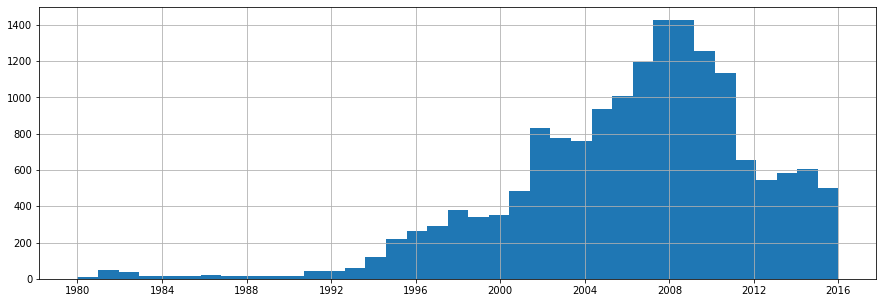

In [28]:
data['year_of_release'].hist(figsize=(15,5), bins=len(data['year_of_release'].unique()))
#проанализируем общее количество продаж по годам.

Глядя на график продаж компьютерных игр с 1980 по 2016 год можно разделить становление рынка видеоигр на несколько этапов:

1) с 1980 по 1990 годы, этап зарождения рынка домашних игровых платформ, в данный период активное развитие получают аркадные игровые автоматы, появляются первые домашние платформы такие как Atatri 2600, первая приставка проданная тиражом свыше 1 млн шт.

2) с 1990 по 2000 год: в 1985 появляется Nintendo Entertainment System (NES), в России известная как Денди, к началу 90-х на рынок выходят ее более совешенные конкуренты от Sega и Sony.

3) c 2000 по 2010 год: взывной рост, появление интернета (как доступной технологии), совершенствование 3D графики как основы для игр и популярность игровых приставок PS2-PS3 и XBOX 360.

4) с 2010 года по 2016 (в примере), резкое снижение объемов продаж (в копиях) видеоигр, возможно связано с широким внедрением подписочной модели растпростанение контента, стабилизация рынка игровых платформ (остались только достаточно крупные игроки, Nicrosoft, Sony, Nintendo, производители PC (комплектующих)), удорожание производства игр, которое привело к росту стоимости конечной игры для пользователя. Но, повторюсь, я не думаю что снижение продаж копий видеоигр привело к столь же сильному снижению финансового потока.

### Определим платформы с наибольшими суммарными продажами <a name="#9-bullet"></a>

In [29]:
platform_pivot = data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
platform_pivot#сгруппируем данные о продажах на разных платформах по годам

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980-01-01,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-01,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-01,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-01,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-01,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Год', ylabel='Обем продаж, млн. копий'>

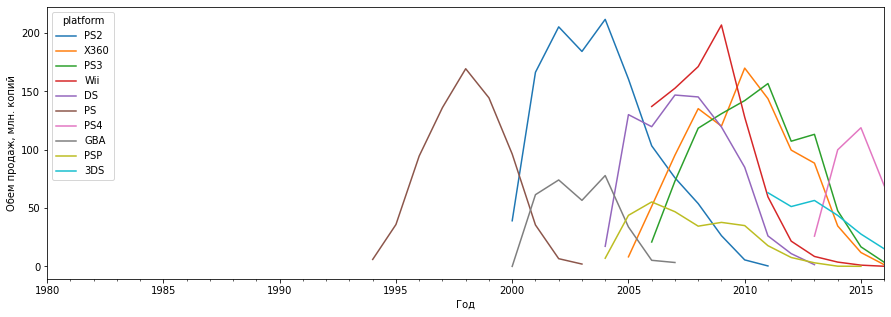

In [30]:
top10_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)
top10_platform = top10_platform.index
platform_pivot[top10_platform].plot(xlabel='Год', ylabel='Обем продаж, млн. копий', figsize=(15,5))
#как видим из таблицы данные по платформам появляются и исчезают, построим график по топ 10 платформам по объему продаж.

По графику видно, что платформы имеют определенный срок жизни, появляются и исчезают? определим средний срок жизни платформы исходя из минимального объема продаж в 10 млн копий.

In [31]:
min_level_sales = 10 #установим минимальный уровень продаж в 10 млн.копий.
report = data.groupby(['platform','year_of_release']).agg({'total_sales':'sum'}).reset_index()
#сгруппируем столбцы по суммарным продажам по годам и платформам
report = report.query('total_sales > @min_level_sales')#выделим данные которые соответствуют условию минимум 10 млн копий продано
report = report.groupby(['platform']).agg({'year_of_release':'nunique'}).rename(columns={'year_of_release':'lifetime'})
median_lifetime = int(report.median()[0])
print('Медианный уровень жизни платформы при минимальном уровне продаж {} млн копий составляет {} лет.' .format(min_level_sales, median_lifetime))

Медианный уровень жизни платформы при минимальном уровне продаж 10 млн копий составляет 6 лет.


Таким образом, платформы появляются и исчезают в среднем за 6 лет, так как прогнозировать продажи игр для платформ которые исчезнут через год не целесообразно, возьмем данные только за последние 3 года (судя по графикам продажи растут впервые три года и снижаются в последующие три).

### Наиболее перспективные платформы (по актуальному периоду) <a name="#10-bullet"></a>

In [32]:
data_new = data.query('year_of_release>=2014').reset_index()#сделаем срез данных с 2014 года

<AxesSubplot:title={'center':'Объем продаж по платформам'}, xlabel='Год', ylabel='Объем продаж'>

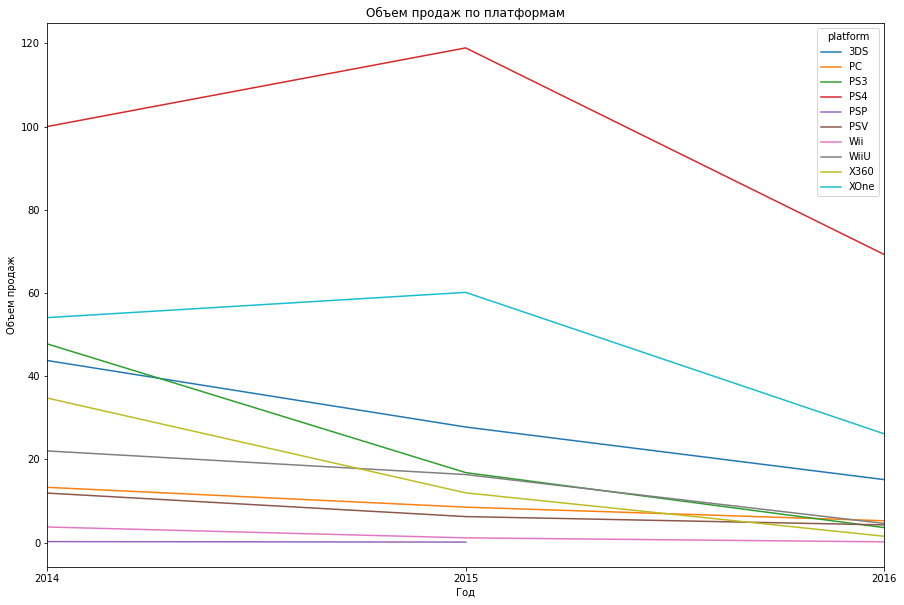

In [33]:
data_new_platform_pivot = data_new.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
data_new_platform_pivot.plot(xlabel='Год', ylabel='Объем продаж', title='Объем продаж по платформам', figsize=(15,10))

In [34]:
data_new_platform_pivot#проанализируем также и табличные значения

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014-01-01,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015-01-01,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016-01-01,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Насколько видно из графиков и таблицы стоит обращать основное внимание на изменение объема продаж с 2014 по 2015 год, в 2016 году заметно снижение объема по всем платформам, скорее всего это вызвано тем, что данные за 2016 год не полные.
Здесь можно выделить следующие платформы: 

PSP - за 2016 год продаж игр нет, продажи консоли прекратились еще в 2012 поддержка в 2014, видимо в 2015 году продавались игры выпущенные ранее. На смену приставки пришла PSV	(Play Station Vita).

Wii - Nintendo Wii поддержка консоли прекращена в 2013 году, ей на смену компания Nintendo выпустила консоль Nintendo Wii U. Поэтому платформу Wii также нужно исключить из исследования.

PS3 (Play Station 3) и X360 (X-BOX 360) также доживают свое, продажи игр сильно снижаются с каждым годом, к тому же уже вышли новые консоли PS4 и XOne. 

PC - продажа игр для персонального компьютера падает год к году, однако, в отличии от игровых консолей PC не столь подвержен старению, поддаетсся модернизации и в целом поддержка той или иной игры связана только с соответсвием системы минимальным системным требованиям. Считаю, что продажи в данном сегменте упали, так как на рынок активно стали выходить интернет площадки (магазины) торгиющие цифровыми копиями игр для PC, это связано в развитием скорости интернета и ростом объема данных игр (сегодня практически ни одна игра не может уместиться на 1 dvd диске, а наиболее масштабные проекты могут весить до 100 гб.)


In [35]:
data_new = data_new[~data_new['platform'].isin(['PS3','Wii','PSP','X360'])].reset_index()
#удалим из фрейма данные по не перспективным консолям

(0.0, 5.0)

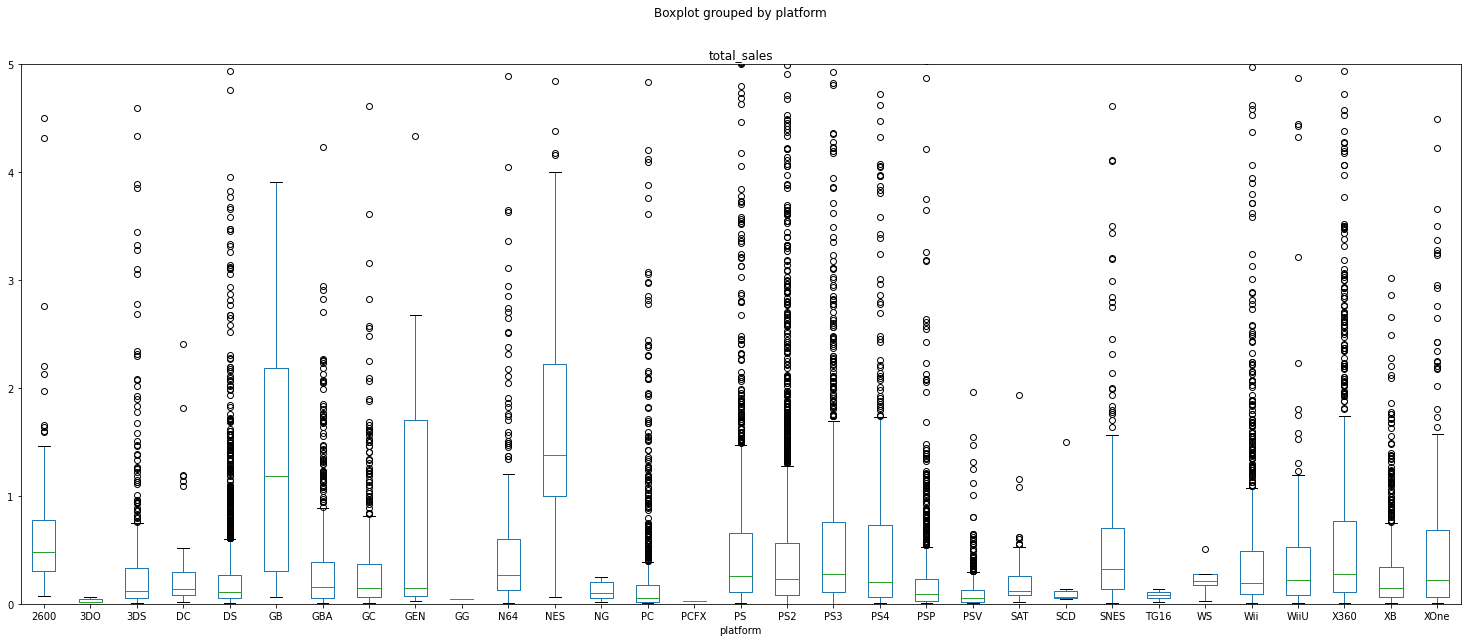

In [36]:
data.boxplot(column=['total_sales'], by='platform', grid= False, figsize=(25,10))
plt.ylim(0, 5)#построим график "ящик с усами" по всем данным

Так наибольшая медиана у платформы NES, попродуем понять почему мы получили такие значения.

In [37]:
data_NES = data.query('platform=="NES"')#сделаем срез данных по платформе NES
data_NES['name'].value_counts().sum()#посчитаем общее количество игр для этой платформы

98

Всего было выпущено 98 игр для платформы NES, в среднем они продавались в количестве от 1 до 2,5 млн копий. В России данная консоль известна как Dendy. И интересно, что NES продавалась с 1983 по 2003 год. 

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

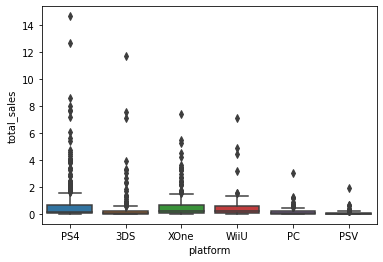

In [38]:
import seaborn as sns
sns.boxplot(x='platform', y='total_sales', data=data_new)
#построим график "ящик с усами" по топовым платформам за последние 3 года

(0.0, 1.6)

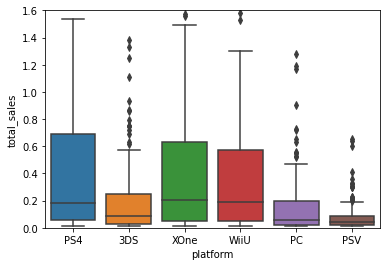

In [39]:
sns.boxplot(x='platform', y='total_sales', data=data_new)
plt.ylim(0, 1.6)#немного приблизим график, что бы оценить медианные значения по платформам

По диаграмме "ящик с усами" можно оценить какое в среднем количесво копий игр продается на выбранных ранее платформах, так наибольшее количесво игр сосредоточны на таких платформах как PS4, WiiU, X-Box One, медианные значения для этих платформ примерно равны, возможно это вызвано тем, что основная масса игр представлена на всех этих платформах, а цены на аналогичные игры обычно не отличаются. Наибольшее число пиков (аномално больших продаж для 1 игры) характерно для платформы PS4, связано это с тем, что для данной платформы характерно большое количество "эксклюзивов", игр которые выпускаются только для данной платформы.

### Оценка влияния отзывы пользователей и критиков на продажи. <a name="#11-bullet"></a>

<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка критиков', ylabel='Объем продаж'>

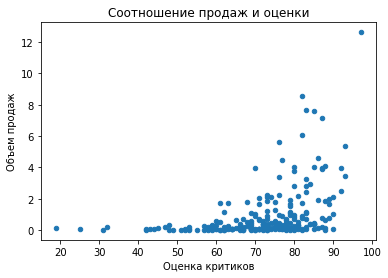

In [40]:
data_new.query('platform=="PS4"').plot(x='critic_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка критиков', ylabel='Объем продаж')
#сделаем срез по самой популярной платформе PS4 и оценим зависимость объема продаж от оценок критиков.

<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка пользователей', ylabel='Объем продаж'>

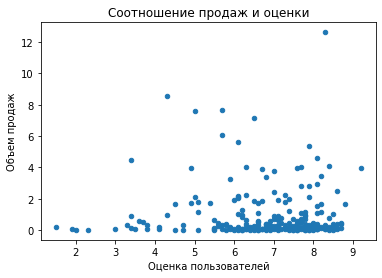

In [41]:
data_new.query('platform=="PS4"').plot(x='user_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка пользователей', ylabel='Объем продаж')
#сделаем срез по самой популярной платформе PS4 и оценим зависимость объема продаж от оценок пользователей.

In [42]:
data_PS4 = data_new.query('platform=="PS4"')
print(data_PS4['total_sales'].corr(data_PS4['critic_score']))#корреляция между объемом продаж и оценкой критиков
print(data_PS4['total_sales'].corr(data_PS4['user_score']))#корреляция между объемом продаж и оценкой пользователей

0.40266141068104083
-0.040131589472697356


В целом на 1 графике видна зависимость объема продаж игр на PS4 от их оценки критиками, так например самые продаваемые игры всегда имеют высокие оценки, но в тоже время довольно много игр с высокими оценками которые не показывают сколь-нибудь сопостовимых объемов продаж, так и расчет корреляции показывает что зависимость положительная но не ярко-выраженная. 

На графике 2 зависимость объема продаж от оценок пользователей, так вот тут данные неоднозначные, так игры с довольно большими продажами часто получают низкие оценки от пользователей, корреляция близка к нулю. Такое случается, например тогда, когда в игру с обновлениями вносят фичи которые не нравятся пользователям, либо же игра которую ждали годами на момент выхода имеет просто нереальное число багов, пользователи в свою очередь обрушают рейтинг игры выставляя ей оценки близкие к нулю.

<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка критиков', ylabel='Объем продаж'>

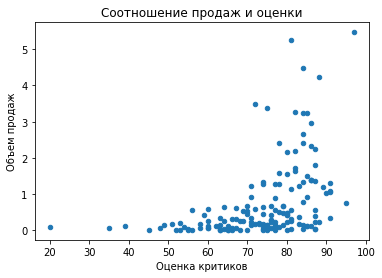

In [43]:
data_new.query('platform=="XOne"').plot(x='critic_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка критиков', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок критиков для X-Box One

<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка пользователей', ylabel='Объем продаж'>

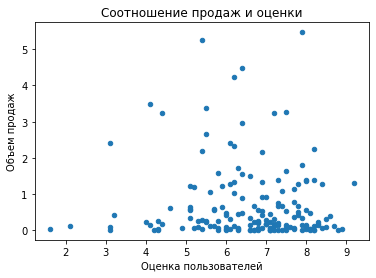

In [44]:
data_new.query('platform=="XOne"').plot(x='user_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка пользователей', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок пользователей для X-Box One

In [45]:
data_XOne = data_new.query('platform=="XOne"')
print(data_XOne['total_sales'].corr(data_XOne['critic_score']))#корреляция между объемом продаж и оценкой критиков
print(data_XOne['total_sales'].corr(data_XOne['user_score']))#корреляция между объемом продаж и оценкой пользователей

0.42867694370333226
-0.0703839280647581


<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка критиков', ylabel='Объем продаж'>

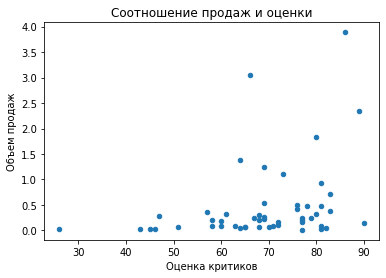

In [46]:
data_new.query('platform=="3DS"').plot(x='critic_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка критиков', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок критиков для 3DS

<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка пользователей', ylabel='Объем продаж'>

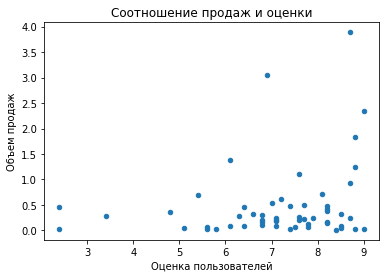

In [47]:
data_new.query('platform=="3DS"').plot(x='user_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка пользователей', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок пользователей для 3DS

In [48]:
data_3DS = data_new.query('platform=="3DS"')
print(data_3DS['total_sales'].corr(data_3DS['critic_score']))#корреляция между объемом продаж и оценкой критиков
print(data_3DS['total_sales'].corr(data_3DS['user_score']))#корреляция между объемом продаж и оценкой пользователей

0.31411749286905105
0.2151932718527028


<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка критиков', ylabel='Объем продаж'>

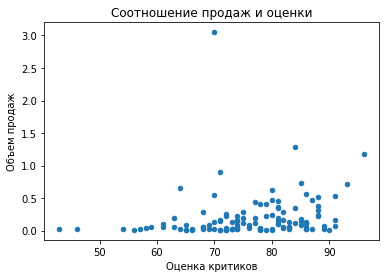

In [49]:
data_new.query('platform=="PC"').plot(x='critic_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка критиков', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок критиков для PC

<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка пользователей', ylabel='Объем продаж'>

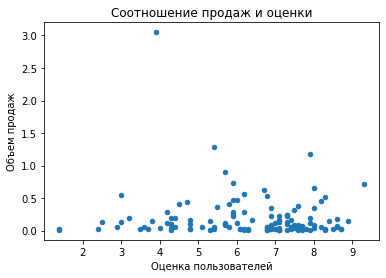

In [50]:
data_new.query('platform=="PC"').plot(x='user_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка пользователей', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок пользователей для PC

In [51]:
data_PC = data_new.query('platform=="PC"')
print(data_PC['total_sales'].corr(data_PC['critic_score']))#корреляция между объемом продаж и оценкой критиков
print(data_PC['total_sales'].corr(data_PC['user_score']))#корреляция между объемом продаж и оценкой пользователей

0.17463413769350036
-0.07159665703472452


<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка критиков', ylabel='Объем продаж'>

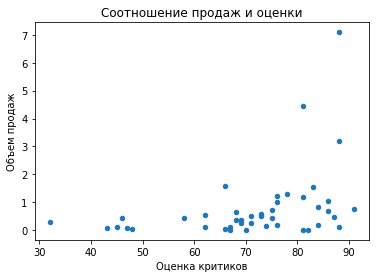

In [52]:
data_new.query('platform=="WiiU"').plot(x='critic_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка критиков', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок критиков для WiiU

<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка пользователей', ylabel='Объем продаж'>

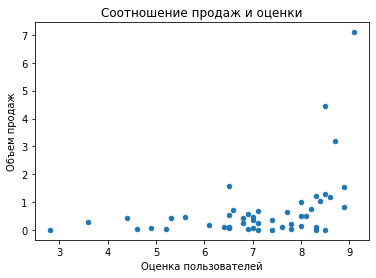

In [53]:
data_new.query('platform=="WiiU"').plot(x='user_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка пользователей', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок пользователей для WiiU

In [54]:
data_WiiU = data_new.query('platform=="WiiU"')
print(data_WiiU['total_sales'].corr(data_WiiU['critic_score']))#корреляция между объемом продаж и оценкой критиков
print(data_WiiU['total_sales'].corr(data_WiiU['user_score']))#корреляция между объемом продаж и оценкой пользователей

0.370201412480884
0.4079264579217078


<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка критиков', ylabel='Объем продаж'>

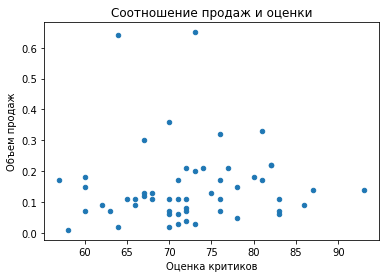

In [55]:
data_new.query('platform=="PSV"').plot(x='critic_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка критиков', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок критиков для PSV

<AxesSubplot:title={'center':'Соотношение продаж и оценки'}, xlabel='Оценка пользователей', ylabel='Объем продаж'>

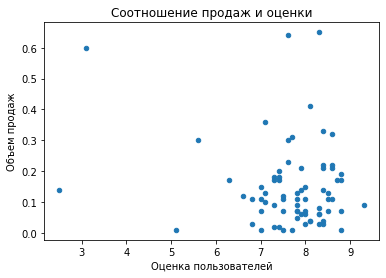

In [56]:
data_new.query('platform=="PSV"').plot(x='user_score', y='total_sales', kind='scatter',\
title='Соотношение продаж и оценки', xlabel='Оценка пользователей', ylabel='Объем продаж')
#оценим зависимость объема продаж от оценок пользователей для PSV

In [57]:
data_PSV = data_new.query('platform=="PSV"')
print(data_PSV['total_sales'].corr(data_PSV['critic_score']))#корреляция между объемом продаж и оценкой критиков
print(data_PSV['total_sales'].corr(data_PSV['user_score']))#корреляция между объемом продаж и оценкой пользователей

0.04266490657009526
-0.16845504978064446


В целом по остальным топ платформам, ситуации схожая ни у одной платформы нет ярко выраженной зависимости количесва проданных копий игр от ее оценки критиками или пользователями, по платформе XOne данные вообще практически не отличаются от PS4, для PSV и PC корреляции близки к нулю, для 3DS и WiiU корреляции положительные, то не ярко выраженные (до 0.5).

Исходя из проведенного анализа мы может сказать, что невозможно срогнозировать объем продаж новой игры исходя из ее оценки, зависимости практически нет.

### Оценка распределение игр по жанрам, определение наиболее перспективных жанров. <a name="#12-bullet"></a>

In [58]:
data_new.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,не определен,14.63
1,1,42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,не определен,11.68
3,3,77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,4,87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,не определен,7.98


In [59]:
data_new_genre = data_new.pivot_table(index='year_of_release', columns='genre',values='total_sales', aggfunc='sum')
data_new_genre.head()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014-01-01,75.40,3.79,13.27,14.67,8.16,1.45,14.13,37.46,44.24,5.51,26.04,0.92
2015-01-01,63.52,6.04,7.08,9.60,5.96,0.71,7.96,36.87,62.71,4.93,30.71,1.85
2016-01-01,28.62,3.61,4.32,2.16,3.02,0.01,2.79,17.72,38.16,1.89,21.21,1.13


In [60]:
data_new_genre_total = data_new.pivot_table(index='genre',values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
#проанализируем общее количество проданных копий игр по жанрам
data_new_genre_total.head(len(data_new['genre']))

,total_sales
genre,
Action,167.54
Shooter,145.11
Role-Playing,92.05
Sports,77.96
Misc,26.43
Racing,24.88
Fighting,24.67
Platform,17.14
Adventure,13.44


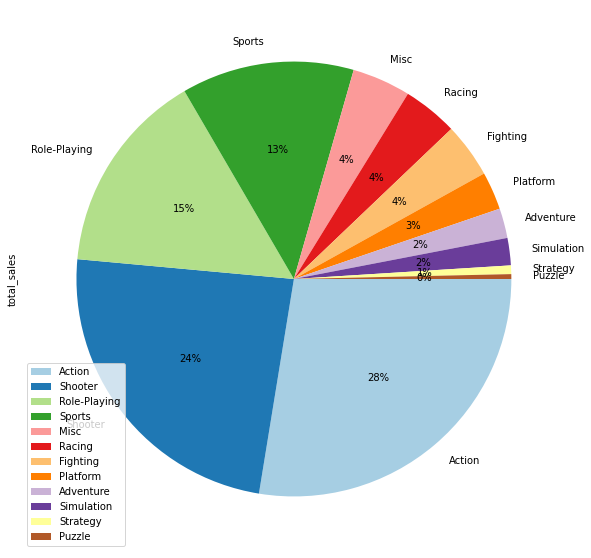

In [61]:
data_new_genre_total.plot(kind='pie', figsize =(10, 10), colormap='Paired', subplots=True, counterclock=False, autopct='%1.0f%%')
plt.legend(loc=3)
#для визуализации построим круговую диаграмму

In [62]:
data_new_genre_mean = data_new.pivot_table(index='genre',values='total_sales', aggfunc='mean')\
.sort_values(by='total_sales', ascending=False).rename(columns={'total_sales':'Продано копий в среднем'})
#проанализируем среднее количество проданных копий игр по жанрам
data_new_genre_mean.head(len(data_new['genre']))

,Продано копий в среднем
genre,
Shooter,1.465758
Sports,0.749615
Fighting,0.649211
Platform,0.519394
Role-Playing,0.492246
Racing,0.469434
Action,0.338465
Simulation,0.308250
Misc,0.296966


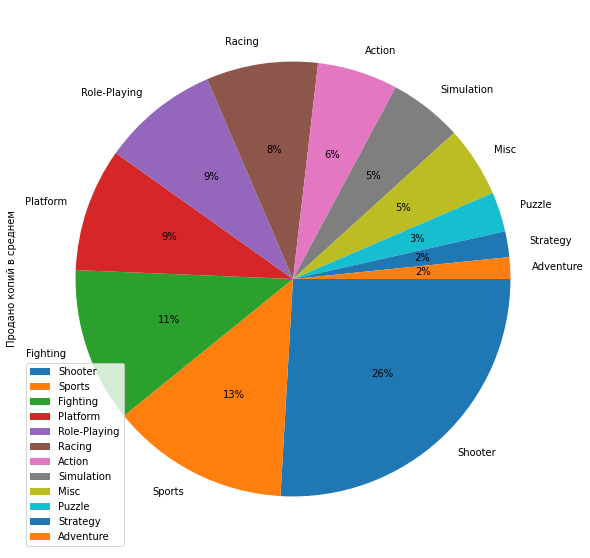

In [63]:
data_new_genre_mean.plot(kind='pie', figsize =(10, 10), subplots=True, counterclock=False, autopct='%1.0f%%')
plt.legend(loc=3)
#для визуализации построим круговую диаграмму

In [64]:
data_new_genre_count = data_new.pivot_table(index='genre',values='total_sales', aggfunc='count')\
.sort_values(by='total_sales', ascending=False).rename(columns={'total_sales':'Игр всего'})
#проанализируем общее количество игр по жанрам
data_new_genre_count.head(len(data_new['genre']))

,Игр всего
genre,
Action,495
Role-Playing,187
Adventure,148
Sports,104
Shooter,99
Misc,89
Racing,53
Simulation,40
Fighting,38


Проанализировав как суммарныепродажи так и средние продажи одной игры с разбивкой по жанрам, можно отметить, что наибольшее число суммарных продаж осталось за жанрами: Action, Shooter, Role-Playing, Sports, наименьшее: Adventure, Simulation, Strategy,
Puzzle. 

При этом пранализировав средние продажи 1 игры для каждого жанра, наиболее прибыльными можно назвать: Shooter, Sports,Fighting; наименее прибыльные: Puzzle, Strategy, Adventure. 

Так можно сказать, что наименее прибыльные жанры и там и там совпадают, а вот в наиболее прибыльных есть существенные различия.
Игры в жанрах Shooter и Sports в обоих случаях в топе продаж, а вот такие популярные(согласно количеству проданных копий всего) жанры как Action и Role-Playing не так успешны в среднем, игры этих жанров в среднем продаются по 330 тыс и 490 тыс копий. Скорее всего, это связано с тем, что игр в данных жанрах выпускается больше всего.

## Портрет пользователя каждого региона <a name="#13-bullet"></a>

In [65]:
data_new.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,не определен,14.63
1,1,42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,не определен,11.68
3,3,77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,4,87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,не определен,7.98


### Северная америка, платформы <a name="#14-bullet"></a>

,na_sales,ratio
platform,,
PS4,98.61,43.04
XOne,81.27,35.47
3DS,22.64,9.88
WiiU,19.36,8.45
PC,7.23,3.16


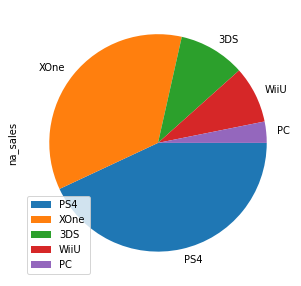

In [66]:
na_sales_platform = data_new.pivot_table(index='platform',values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)
#проанализируем общее количество проданных копий игр по платформам для рынка Северной Америки
na_sales_platform = na_sales_platform[:5]#оставим топ 5
na_sales_platform['ratio'] = ((na_sales_platform['na_sales']/na_sales_platform['na_sales'].sum())*100).round(2)
#посчитаем долю
display(na_sales_platform)
na_sales_platform['na_sales'].plot(kind='pie', figsize =(5, 5), subplots=True, counterclock=False)
plt.legend(loc=3)#построим диаграмму

### Европа, платформы <a name="#15-bullet"></a>

,eu_sales,ratio
platform,,
PS4,130.04,58.18
XOne,46.25,20.69
PC,17.97,8.04
3DS,16.12,7.21
WiiU,13.15,5.88


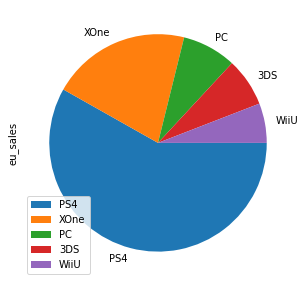

In [67]:
eu_sales_platform = data_new.pivot_table(index='platform',values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)
#проанализируем общее количество проданных копий игр по платформам для рынка Европы
eu_sales_platform = eu_sales_platform[:5]#оставим топ 5
eu_sales_platform['ratio'] = ((eu_sales_platform['eu_sales']/eu_sales_platform['eu_sales'].sum())*100).round(2)
#посчитаем долю
display(eu_sales_platform)
eu_sales_platform['eu_sales'].plot(kind='pie', figsize =(5, 5), subplots=True, counterclock=False)
plt.legend(loc=3)#построим диаграмму

### Япония, платформы <a name="#16-bullet"></a>

,jp_sales,ratio
platform,,
3DS,44.24,54.33
PS4,15.02,18.45
PSV,14.54,17.86
WiiU,7.31,8.98
XOne,0.32,0.39


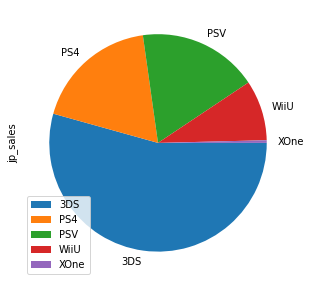

In [68]:
jp_sales_platform = data_new.pivot_table(index='platform',values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)
#проанализируем общее количество проданных копий игр по платформам для рынка Японии
jp_sales_platform = jp_sales_platform[:5]#оставим топ 5
jp_sales_platform['ratio'] = ((jp_sales_platform['jp_sales']/jp_sales_platform['jp_sales'].sum())*100).round(2)
#посчитаем долю
display(jp_sales_platform)
jp_sales_platform['jp_sales'].plot(kind='pie', figsize =(5, 5), subplots=True, counterclock=False)
plt.legend(loc=3)#построим диаграмму

Составив портрет покупателя для разных рынков в разрезе популярных платформ можно сделать следующие выводы:

На рынке Северной Америки преобладают такие платформы как PS4 и XOne, доли в 43 и 35 % соответственно, остальные приставки с долей продаж не превышающих 10%

На европейском рынке ситуации схожая, однако доля PS4 существенно выше - 58% у XOne - 20%, остальные платформы из топ5 не более 10%

Совершенно иная ситуация на рынке Японии, лидеруют по продажам игры для платформы 3DS - 54%, примерно равное количесво игр продается для PS4 - 18% и PSV - 17%, продажи игра для XOne можно считать стат погрешностью, американская консоль на японском рынке конкуренцию японским производителям составить не может.

Стоит отметить, что 3DS и PSV это портативные приставки, в то время как XOne и PS4 это полноценные игровые приставки которые используются для игры на ТВ.

### Северная Америка, жанры <a name="#17-bullet"></a>

,na_sales,ratio
genre,,
Shooter,66.29,33.25
Action,60.16,30.17
Sports,31.96,16.03
Role-Playing,29.74,14.92
Fighting,11.23,5.63


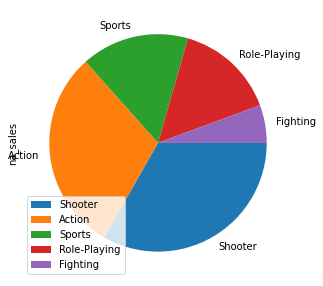

In [69]:
na_sales_genre = data_new.pivot_table(index='genre',values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)
#проанализируем общее количество проданных копий игр по жанрам для рынка Северной Америки
na_sales_genre = na_sales_genre[:5]#оставим топ 5
na_sales_genre['ratio'] = ((na_sales_genre['na_sales']/na_sales_genre['na_sales'].sum())*100).round(2)
#посчитаем долю
display(na_sales_genre)
na_sales_genre['na_sales'].plot(kind='pie', figsize =(5, 5), subplots=True, counterclock=False)
plt.legend(loc=3)#построим диаграмму

### Европа, жанры <a name="#18-bullet"></a>

,eu_sales,ratio
genre,,
Action,63.49,33.06
Shooter,56.23,29.28
Sports,33.48,17.43
Role-Playing,25.94,13.51
Racing,12.92,6.73


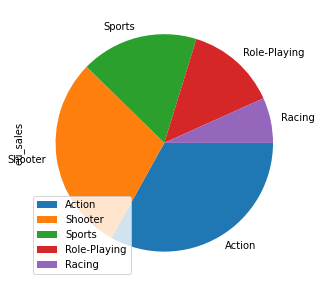

In [70]:
eu_sales_genre = data_new.pivot_table(index='genre',values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)
#проанализируем общее количество проданных копий игр по жанрам для рынка Европы
eu_sales_genre = eu_sales_genre[:5]#оставим топ 5
eu_sales_genre['ratio'] = ((eu_sales_genre['eu_sales']/eu_sales_genre['eu_sales'].sum())*100).round(2)
#посчитаем долю
display(eu_sales_genre)
eu_sales_genre['eu_sales'].plot(kind='pie', figsize =(5, 5), subplots=True, counterclock=False)
plt.legend(loc=3)#построим диаграмму

### Япония, жанры <a name="#19-bullet"></a>

,jp_sales,ratio
genre,,
Role-Playing,28.70,42.33
Action,24.71,36.45
Misc,5.17,7.63
Fighting,5.01,7.39
Shooter,4.21,6.21


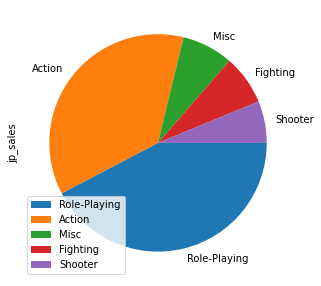

In [71]:
jp_sales_genre = data_new.pivot_table(index='genre',values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)
#проанализируем общее количество проданных копий игр по жанрам для рынка Европы
jp_sales_genre = jp_sales_genre[:5]#оставим топ 5
jp_sales_genre['ratio'] = ((jp_sales_genre['jp_sales']/jp_sales_genre['jp_sales'].sum())*100).round(2)
#посчитаем долю
display(jp_sales_genre)
jp_sales_genre['jp_sales'].plot(kind='pie', figsize =(5, 5), subplots=True, counterclock=False)
plt.legend(loc=3)#построим диаграмму

In [72]:
PS4_na = data_new.query('platform=="PS4"').sort_values(by='na_sales', ascending=False)
PS4_na.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,не определен,14.63
1,1,42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,4,87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,не определен,7.98
5,5,92,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
9,9,105,Fallout 4,PS4,2015-01-01,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [73]:
PS4_eu = data_new.query('platform=="PS4"').sort_values(by='eu_sales', ascending=False)
PS4_eu.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,1,42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,3,77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
0,0,31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,не определен,14.63
6,6,94,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
12,12,143,FIFA 15,PS4,2014-01-01,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08


In [74]:
Nintendo3DS = data_new.query('platform=="3DS"').sort_values(by='jp_sales', ascending=False)
Nintendo3DS.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
40,44,412,Yokai Watch 2 Ganso/Honke,3DS,2014-01-01,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,не определен,3.28
2,2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,не определен,11.68
39,43,406,Monster Hunter X,3DS,2015-01-01,Action,0.27,0.21,2.79,0.05,NaN,NaN,не определен,3.32
53,59,563,Yokai Watch 2 Shinuchi,3DS,2014-01-01,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,не определен,2.68
31,35,312,Monster Hunter 4 Ultimate,3DS,2014-01-01,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89


В разбивке по жанрам ситуация следующая:

Северная Америка - топ жанры по продажам: Shooter, Action, Sports (33,30,16% соответственно), в топ 5 игр 2 игры из серии Call of Duty (Shooter).

Европа: Action, Shooter, Sports (33,29,17%), в топ 5 игр по продажам: симулятор футбола Fifa за 3 года (2014, 2015, 2016, жанр Sports)

Япония: Role-Playing, Action, Misc, Fighting (42,36,7,7%), выделил топ 4, так как не очень ясно что скрывается под жанром Misc, скорее всего здесь собраны игры жанр которых сложно определить однозначно, либо игры разных жанров которые можно охарактеризовать как 'Другие'. Очень явно выделен жанр Role-Playing (ролевая игра), это связано с популярность в Японии портативных консолей Nintendo 3DS и PlayStation Vita (PSV), 4 из 5 наиболее продаваемых игр для Nintendo 3DS жанра Role-Playing.
Также характерна высокая доля для игр в жанре Fighting, так как практически все популярные игры данной теманики связаны с восточными единоборствами и разрабатываются японскими студиями.


### Зависимость продаж от рейтинга ESRB <a name="#20-bullet"></a>

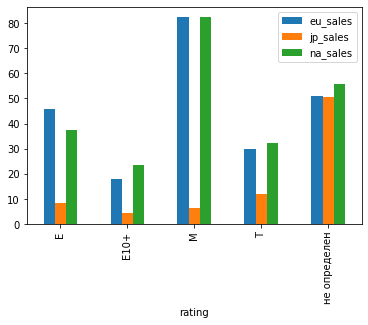

In [75]:
data_new_ESRB = data_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.plot(kind='bar')#проверим зависимость общего количества продаж от рейтинка

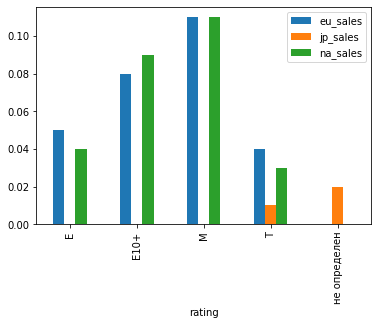

In [76]:
data_new_ESRB = data_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median')\
.plot(kind='bar')#проверим зависимость медианного количества продаж одной игры от рейтинка

Как в суммарном выражении, так и при обращении к медианному значению наибольшие продажи в Северной Америке и Европе характерны для игр с рейтингом M (17+), в то время как в Японии пиковые значения приходятся на игры где рейтинг неопределен (возможно это связано с тем, что организация ESRB определяет рейтинг для рынков СЩА и Канады, и может не выдавать оценки для игр которые растпростанены только на Японском рынке).

## Провека гипотез <a name="#21-bullet"></a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a name="#21-bullet"></a>

In [77]:
XOne_user_score = data_new.query('platform=="XOne"')['user_score'].dropna() #выборка для XBox One
PC_user_score = data_new.query('platform=="PC"')['user_score'].dropna() #выборка для PC

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    XOne_user_score, 
    PC_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Н0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Н1 - Средние пользовательские рейтинги платформ Xbox One и PC разные.

По результатам стат.теста мы можем сделать вывод, что есть слишком высокая вероятность для того, чтобы делать выводы о значимом равенстве между метриками (средние пользовательсткие рейтинги для игр на XBox One и PC). 
Скорее всего это связано с тем, что XBox игровая консоль созданная компанией Microsoft, как и самая популярная операционная система для PC - Windows, поэтому часто одни и те же игры представленны на обоих этих платформах.

### Средние пользовательские рейтинги жанров Action и Sports разные <a name="#22-bullet"></a>

In [78]:
Action_user_score = data_new.query('genre=="Action"')['user_score'].dropna() #выборка для Action
Sports_user_score = data_new.query('genre=="Sports"')['user_score'].dropna() #выборка для Sports

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Action_user_score, 
    Sports_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.281270205370119e-10
Отвергаем нулевую гипотезу


Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые (Несмотря на заголовок, нулевую гипотезу всегда формулируется на условие равенства - так устроен стат-тест внутри.)

Н1 - Средние пользовательские рейтинги жанров Action и Sports разные

В данном случае мы отвергли нулевую гипотезу, а альтернативную приняли, действительно слишком высокая вероятность для того, чтобы делать выводы о значимом различии между метриками (средние оценки в жанрах  Action и Sports).

## Вывод <a name="#23-bullet"></a>

Мы получили для анализа данные о продажах компьютерных игр с 1980 года по 2016. На основании данных нам нужно было выявить определяющие успешность игры закономерности, что бы в будущем сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

1.Подготовили данные для анализа, мы изменили наименования столбцов, удалили пропуски, в столбце user_score обработали неизвестное значение 'tbd'. Также изменили типы данных столбца 'year_of_release' - на данные типа datetime, столбца 'user_score' - на float. Пропуски в столбце 'rating' заменили значение 'не определен'. Добавили столбец суммарные продажи.

2.Определили периоды развития рынка видеоигр, с 1980 по 2016 выделили несколько этапов: этап зарождения рынка домашних игровых платформ - 80-е, этап умеренного роста, из-за выхода популярных домашних игровых платформ (Денди, Sega и Sony PlayStation) - 90-е? взывной рост в 2000-2010 году, и резкое снижение объемов продаж (в копиях) видеоигр после 2010 года, стабилизация рынка игровых платформ (остались только достаточно крупные игроки, Nicrosoft, Sony, Nintendo, производители PC (комплектующих)).

3.Определили средний срок жизни игровой платформы (6 лет), выяснили что в первые 3 года жизни платформы количество продаж игр растет в последующие - падает. Для анализа выбрали только данные по продажамм за последние 3 года. 

4.На основе данных об изменении объема продаж с 2014 по 2015 год (в 2016 году заметно снижение объема по всем платформам, данные за 2016 год не полные) отказались от анализа данных по уходящим с рыннка платформам: PSP ей ев смену пришла PSV (Play Station Vita), Wii - ее сменила Nintendo Wii U, PS3 (Play Station 3) и X360 (X-BOX 360), так как уже вышли новые консоли PS4 и XOne.

5.По диаграмме размаха оценили какое в среднем количесво копий игр продается на выбранных ранее платформах, так наибольшее количесво игр сосредоточны на таких платформах как PS4, WiiU, X-Box One, медианные значения для этих платформ примерно равны, возможно это вызвано тем, что основная масса игр представлена на всех этих платформах. Наибольшее число пиков (аномално больших продаж для 1 игры) характерно для платформы PS4, связано это с тем, что для данной платформы характерно большое количество "эксклюзивов", игр которые выпускаются только для данной платформы.

6.Определили, что PS4 является наиболее популярно платформой, оценили зависимость объема продаж игр на PS4 от их оценки критиками и пользователями, корреляции положительная но не ярко-выраженная, экстраполировали результаты на топ 5 игровых платформ, нигде сколь нибудь значимой завсисмости выявить не удалось. Исходя из проведенного анализа невозможно срогнозировать объем продаж новой игры исходя из ее оценки, зависимости практически нет.

7.Проанализировали как суммарныепродажи так и средние продажи одной игры с разбивкой по жанрам, можно отметить, что наибольшее число суммарных продаж осталось за жанрами: Action, Shooter, Role-Playing, Sports, наименьшее: Adventure, Simulation, Strategy, Puzzle. При этом пранализировав средние продажи 1 игры для каждого жанра, наиболее прибыльными можно назвать: Shooter, Sports,Fighting; наименее прибыльные: Puzzle, Strategy, Adventure.

Так можно сказать, что наименее прибыльные жанры и там и там совпадают, а вот в наиболее прибыльных есть существенные различия. Игры в жанрах Shooter и Sports в обоих случаях в топе продаж, а вот такие популярные(согласно количеству проданных копий всего) жанры как Action и Role-Playing не так успешны в среднем, игры этих жанров в среднем продаются по 330 тыс и 490 тыс копий. Скорее всего, это связано с тем, что игр в данных жанрах выпускается больше всего.

8.Составили портрет покупателя для разных рынков в разрезе популярных платформ можно сделать следующие выводы:
На рынке Северной Америки и Европы преобладают такие платформы как PS4 и XOne, для Японии, лидеруют по продажам игры для платформы 3DS, игры для XOne и PC практически не продаются.

9.Наиболее популярные жанры: 
Северная Америка - топ жанры по продажам: Shooter, Action, Sports (33,30,16% соответственно)
Европа: Action, Shooter, Sports (33,29,17%)
Япония: Role-Playing, Action, Misc, Fighting (42,36,7,7%)

10.Как в суммарном выражении, так и при обращении к медианному значению наибольшие продажи в Северной Америке и Европе характерны для игр с рейтингом M (17+), в то время как в Японии пиковые значения приходятся на игры где рейтинг неопределен.

11.Проверены статистические гипотезы: 1)Вероятность что средние оценки для игр на XBox One и PC одинаковые достаточна высока.
2)Вероятность того, что средние оценки в жанрах Action и Sports разные достаточно высока.

В целом, на основе анализа и прогнозируя закупки и рекламные компании для 2017 год можно отметить следующее:

Для Северной Америки и Европы необходимо сделать акцент на таких платформах как PS4 и XBox One, все топовые в плане продаж игры будут выходить на этих платформах, продавать игры для PC и портативных консолей рекомендуется сосредоточится на продажах только наиболее ожидаемых игровых релизов, также зарекомендовавших себя хитов прошлых лет. При выборе игр для рекламных компаний следует сосредоточиться на ожидаемых новинках, так как не удалось выявить зависимостей продаж от оценок критиков и пользователей, для уже выпущеных игр. 

Немного другую стратегию необходимо использовать для рынка Японии, необходимо сосредоточиться на портативных приставках Nintendo 3DS и PlayStation Vita, а также PS4, игры XBox One и PC, практически не продаются, можно ограничиться хитами продаж для данных платформ.